In [3]:
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
col=['petal_length','petal_width','species']

In [6]:
df.loc[:,col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [7]:
col=['petal_length','petal_width']
X=df.loc[:,col]

In [8]:
species_to_num={
    'setosa':0,
    'versicolor':1,
    'virginica':2
}
df['tmp']=df['species'].map(species_to_num)
Y=df['tmp']

# LINEAR SVM

In [9]:
C=0.001
model=svm.SVC(kernel='linear',C=C)
model.fit(X,Y)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
model.predict([[6,2]])

array([2], dtype=int64)

In [14]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
Y_min, Y_max = Y.min(), Y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(Y_min, Y_max, h))

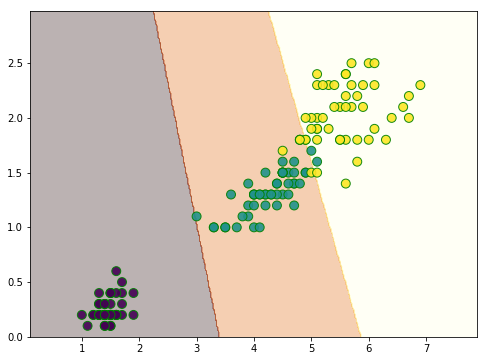

In [16]:
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=Y, s=80, 
            alpha=0.9, edgecolors='g');

# Linear SVM Implementation

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=0)

# Scale Features

In [33]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_standard_train=sc.fit_transform(X_train)
C=1.0
model_1=svm.SVC(kernel='linear',C=C)
model_1.fit(X_standard_train,Y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
X_standard_train

array([[ 0.94751783,  0.736072  ],
       [ 0.38491447,  0.34752959],
       [-1.30289562, -1.33615415],
       [ 0.60995581,  0.736072  ],
       [ 1.00377816,  1.25412853],
       [ 0.04735245,  0.21801546],
       [-1.19037495, -1.20664002],
       [ 0.72247648,  0.47704373],
       [ 0.21613346,  0.34752959],
       [ 0.10361279, -0.04101281],
       [ 0.94751783,  1.1246144 ],
       [-1.41541629, -1.33615415],
       [ 0.72247648,  1.38364267],
       [-1.24663528, -0.81809761],
       [-1.30289562, -1.33615415],
       [-0.1776889 , -0.30004108],
       [ 0.94751783,  0.736072  ],
       [ 1.0600385 ,  1.64267094],
       [ 0.66621615,  0.34752959],
       [ 1.11629884,  0.736072  ],
       [ 0.04735245, -0.17052694],
       [ 1.28507985,  1.38364267],
       [ 0.49743514,  0.47704373],
       [-0.00890789, -0.17052694],
       [ 0.60995581,  0.736072  ],
       [ 0.72247648,  0.34752959],
       [ 0.38491447,  0.60655786],
       [ 0.66621615,  0.86558613],
       [ 0.49743514,

# Accuracy 

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [36]:
score=cross_val_score(model,X_standard_train,Y_train,cv=10,scoring='accuracy')

In [37]:
score

array([0.41666667, 0.41666667, 0.41666667, 0.41666667, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333])

In [38]:
print('Average Accuracy:{:,.4f}'.format(np.mean(score)))
print('Standard Deviation:{:,.4f}'.format(np.std(score)))

Average Accuracy:0.3667
Standard Deviation:0.0408


In [44]:
Y_train_pred=cross_val_predict(model,X_standard_train,Y_train,cv=3)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train,Y_train_pred)

array([[ 0,  0, 39],
       [ 0,  0, 37],
       [ 0,  0, 44]], dtype=int64)

In [46]:
print("Precision Score: \t {0:.4f}".format(precision_score(Y_train, 
                                                           Y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(Y_train,
                                                     Y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(Y_train,
                                             Y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.1344
Recall Score: 		 0.3667
F1 Score: 		 0.1967


C:\Users\SANDY\Anaconda3\envs\ml_2020\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# with test